In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
    
df = pd.read_csv(url)

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


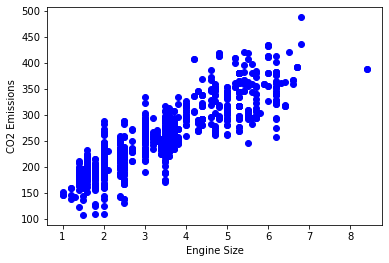

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_X = np.asanyarray(train[['ENGINESIZE']]) 
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_X = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 2)
train_X_poly = poly.fit_transform(train_X)
train_X_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [10]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_X_poly, train_y)

print('Coefficients: ', clf.coef_)
print('Intercepts: ', clf.intercept_)

Coefficients:  [[ 0.         50.72878009 -1.58354746]]
Intercepts:  [108.22907557]


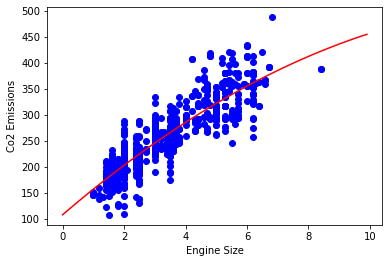

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')

XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX,2)

plt.plot(XX,yy, color='red')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.show()

In [13]:
from sklearn.metrics import r2_score

test_X_poly = poly.transform(test_X)
test_y_ = clf.predict(test_X_poly)     #이미 앞서서 training set으로 fit을 했으니 여기서는 거기서 도출된 parameter를 이용해 transform만 하면 된다.

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE) : %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 24.06
Residual sum of squares (MSE) : 968.12
R2-score: 0.74


In [15]:
poly3 = PolynomialFeatures(degree= 3)
train_X_poly3 = poly3.fit_transform(train_X)
clf3 = linear_model.LinearRegression()
train_y3 = clf3.fit(train_X_poly3, train_y)

In [16]:
print('Coefficients: ', clf3.coef_)
print('Intercepts: ', clf3.intercept_)

Coefficients:  [[ 0.         31.09758416  3.81208831 -0.44602594]]
Intercepts:  [129.07350256]


Text(0, 0.5, 'CO2 Emissions')

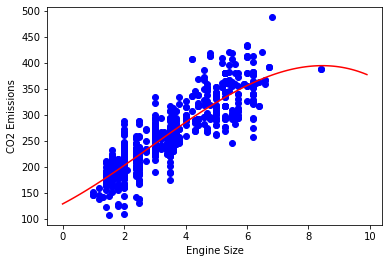

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0] + clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, color='red')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

In [19]:
test_X_poly3 = poly3.transform(test_X)
test_y3_ = clf3.predict(test_X_poly3)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("MSE: %.2f" % np.mean((test_y3_ - test_y)**2))
print("R2 Score: %.2f" % r2_score(test_y, test_y3_))

Mean Absolute Error: 24.06
MSE: 963.52
R2 Score: 0.74
